In [13]:
ls UrbanSound8K/audio/fold1/102106-3-0-0.wav

UrbanSound8K/audio/fold1/102106-3-0-0.wav


In [14]:
filename = 'UrbanSound8K/audio/fold1/102106-3-0-0.wav'

In [16]:
import librosa
librosa_audio_data, librosa_sample_rate = librosa.load(filename)

In [17]:
librosa_audio_data

array([ 0.00652341,  0.00239341, -0.00151045, ...,  0.00088413,
       -0.00176583,  0.00274018], dtype=float32)

In [18]:
librosa_sample_rate

22050

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

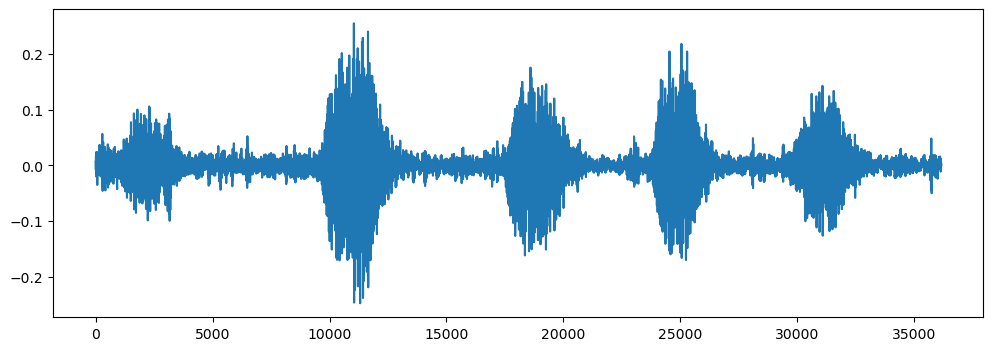

In [21]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [22]:
from scipy.io import wavfile as wav

In [24]:
scipy_sample_rate, scipy_audio_data = wav.read(filename)

In [25]:
scipy_sample_rate

44100

In [26]:
scipy_audio_data

array([[-385,  996],
       [-378,  810],
       [-539,  588],
       ...,
       [-193,    4],
       [ 103,  192],
       [ 177,  226]], dtype=int16)

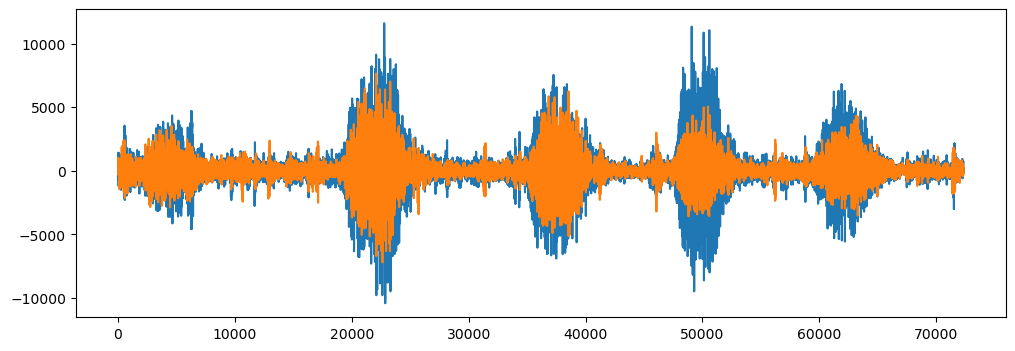

In [28]:
plt.figure(figsize=(12,4))
plt.plot(scipy_audio_data)

In [33]:
# Mel Frequency Cepstral Cofficients - MFCC

**In sound processing, the mel-frequency cepstrum is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. Mel-frequency cepstral coefficients are coefficients that collectively make up an MFC.**

In [34]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=22050, n_mfcc=40)

In [37]:
mfccs.shape

(40, 71)

In [38]:
mfccs

array([[-236.31181  , -244.66196  , -254.437    , ..., -303.10797  ,
        -295.39877  , -272.6323   ],
       [  98.40851  ,  100.22833  ,   98.88959  , ...,   87.20518  ,
          86.63573  ,   76.56164  ],
       [ -37.07654  ,  -40.440598 ,  -50.288254 , ...,  -38.191456 ,
         -34.161922 ,  -35.50981  ],
       ...,
       [   3.880682 ,    4.5937147,    3.3501034, ...,    3.5871143,
           5.828745 ,    5.8923826],
       [  -3.5372984,   -2.9877486,    5.7702494, ...,   -3.421142 ,
          -0.7532111,    2.1962557],
       [   2.2270064,    1.9546865,    4.404172 , ...,    1.3194762,
          -1.5568525,   -2.292913 ]], dtype=float32)

In [51]:
import pandas as pd
import os
import librosa

In [41]:
audio_dataset_path = 'UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [42]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [52]:
import numpy as np

In [78]:
def features_extractor(file):
    audio_data, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [79]:
from tqdm import tqdm

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = audio_dataset_path + 'fold'+str(row['fold'])+'/'+str(row['slice_file_name'])
    final_class_labels = row['class'] 
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3555it [09:19,  5.04it/s]/home/ataullha/anaconda3/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [25:26,  5.73it/s]/home/ataullha/anaconda3/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [25:26, 11.27it/s]/home/ataullha/anaconda3/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [26:52,  5.41it/s]


In [80]:
import pandas as pd

In [82]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.53568, 51.969467, ...",children_playing
3,"[-413.6325, 101.61351, -35.43868, 53.047146, 1...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349728, 2...",children_playing


In [87]:
X = np.array(extracted_features_df.feature.to_list())
X

array([[-2.1495764e+02,  7.0502464e+01, -1.3070279e+02, ...,
        -1.7985294e+00, -7.5557315e-01,  2.1362247e-01],
       [-4.2373111e+02,  1.0922990e+02, -5.2872597e+01, ...,
         5.1947594e-01, -5.5776060e-01,  4.2022952e-01],
       [-4.5852844e+02,  1.2135432e+02, -4.6535679e+01, ...,
         2.1064727e+00,  1.6903535e+00, -9.9965793e-01],
       ...,
       [-3.0365482e+02,  1.1128415e+02, -4.5883854e+01, ...,
        -3.0395653e+00,  2.7439008e+00,  7.6161957e+00],
       [-3.4375665e+02,  1.2542341e+02, -5.4899651e+01, ...,
        -7.8976536e+00, -1.6542717e+00,  5.6863704e+00],
       [-3.1520370e+02,  9.4662476e+01, -3.7090714e+01, ...,
         5.7593846e-01, -1.1423327e+01, -6.0395098e+00]], dtype=float32)

In [90]:
y = np.array(extracted_features_df['class'].to_list())
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [91]:
y = np.array(pd.get_dummies(y))

In [92]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [93]:
y.shape

(8732, 10)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [98]:
X_train.shape

(6985, 40)

In [99]:
X_test.shape

(1747, 40)

In [100]:
y_train.shape

(6985, 10)

In [101]:
y_test.shape

(1747, 10)

In [102]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [105]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 1.4 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.4 MB/s eta 0:00:003.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 556.8 kB/s eta 0:00:0031m4.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.3 MB/s eta 0:00:002.9 MB/s eta 0:00:01
  Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
     ━━━

In [106]:
import tensorflow as tf

2023-03-12 18:30:59.750881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 18:31:00.010701: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-12 18:31:00.072476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 18:31:00.072510: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [107]:
tf.__version__

'2.11.0'

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [112]:
num_labels = y.shape[1]

In [113]:
num_labels

10

In [120]:
model = Sequential()

# first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
          
# final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [121]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [122]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [123]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [125]:
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(
    filepath='saved_models/audio_classification.hdf5', 
    verbose=1,
    save_best_only=True)

start = datetime.now()

model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer],
    verbose=1
)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
216/219 [============================>.] - ETA: 0s - loss: 1.8437 - accuracy: 0.3262
Epoch 1: val_loss improved from inf to 1.65589, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.8430 - accuracy: 0.3270 - val_loss: 1.6559 - val_accuracy: 0.4356
Epoch 2/100
210/219 [===========================>..] - ETA: 0s - loss: 1.7852 - accuracy: 0.3494
Epoch 2: val_loss improved from 1.65589 to 1.58102, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.7838 - accuracy: 0.3500 - val_loss: 1.5810 - val_accuracy: 0.4780
Epoch 3/100
213/219 [============================>.] - ETA: 0s - loss: 1.7329 - accuracy: 0.3710
Epoch 3: val_loss improved from 1.58102 to 1.53931, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.7339 - accuracy: 0.3709 - val_loss: 1.5393 - val_accuracy: 0.5037

216/219 [============================>.] - ETA: 0s - loss: 1.2513 - accuracy: 0.5666
Epoch 26: val_loss improved from 1.06681 to 1.05436, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.2523 - accuracy: 0.5659 - val_loss: 1.0544 - val_accuracy: 0.6543
Epoch 27/100
214/219 [============================>.] - ETA: 0s - loss: 1.2309 - accuracy: 0.5778
Epoch 27: val_loss improved from 1.05436 to 1.01469, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.2315 - accuracy: 0.5792 - val_loss: 1.0147 - val_accuracy: 0.6629
Epoch 28/100
216/219 [============================>.] - ETA: 0s - loss: 1.2237 - accuracy: 0.5793
Epoch 28: val_loss improved from 1.01469 to 1.01371, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.2258 - accuracy: 0.5788 - val_loss: 1.0137 - val_accuracy: 0.6737
Ep

204/219 [==========================>...] - ETA: 0s - loss: 1.0955 - accuracy: 0.6373
Epoch 52: val_loss did not improve from 0.88206
219/219 [==============================] - 1s 4ms/step - loss: 1.0921 - accuracy: 0.6365 - val_loss: 0.8922 - val_accuracy: 0.7127
Epoch 53/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0787 - accuracy: 0.6385
Epoch 53: val_loss improved from 0.88206 to 0.86772, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0799 - accuracy: 0.6377 - val_loss: 0.8677 - val_accuracy: 0.7304
Epoch 54/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0678 - accuracy: 0.6337
Epoch 54: val_loss improved from 0.86772 to 0.85701, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0677 - accuracy: 0.6351 - val_loss: 0.8570 - val_accuracy: 0.7367
Epoch 55/100
210/219 [===========================>..] - ETA: 0

203/219 [==========================>...] - ETA: 0s - loss: 1.0048 - accuracy: 0.6633
Epoch 80: val_loss did not improve from 0.81845
219/219 [==============================] - 1s 4ms/step - loss: 1.0068 - accuracy: 0.6617 - val_loss: 0.8293 - val_accuracy: 0.7401
Epoch 81/100
205/219 [===========================>..] - ETA: 0s - loss: 0.9996 - accuracy: 0.6639
Epoch 81: val_loss improved from 0.81845 to 0.80286, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.0026 - accuracy: 0.6633 - val_loss: 0.8029 - val_accuracy: 0.7418
Epoch 82/100
208/219 [===========================>..] - ETA: 0s - loss: 0.9908 - accuracy: 0.6686
Epoch 82: val_loss did not improve from 0.80286
219/219 [==============================] - 1s 4ms/step - loss: 0.9958 - accuracy: 0.6669 - val_loss: 0.8348 - val_accuracy: 0.7275
Epoch 83/100
205/219 [===========================>..] - ETA: 0s - loss: 1.0030 - accuracy: 0.6582
Epoch 83: val_loss did n

In [130]:
test_accuracy=model.evaluate(X_test, y_test, verbose=0)
test_accuracy

[0.7689453363418579, 0.7607327103614807]

In [147]:
filename = 'mixkit-dog-barking-twice-1.wav'
predicted_feature = feature_extractor(filename)
predicted_feature = predicted_feature.reshape(1,40)

In [167]:
predicted_feature.shape

(1, 40)

In [168]:
predicted_val = model.predict(predicted_feature)

1/1 [==============================] - 0s 36ms/step


In [182]:
predicted_val

array([[5.2132965e-21, 2.5974962e-09, 3.9718163e-08, 9.9880755e-01,
        1.9909914e-06, 1.1821918e-16, 1.1876611e-03, 4.5261499e-33,
        1.3411908e-06, 1.4089782e-06]], dtype=float32)

In [195]:
predicted_val = predicted_val.reshape(10)

In [236]:
cnt = 0
for i in predicted_val:
    if i == max(predicted_val):
        idx = int(i)
    cnt += 1

In [237]:
l = metadata['class'].unique().tolist()

In [238]:
l[idx]

'dog_bark'